In [27]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# importing libraries/modules, and functions
import pandas as pd
import numpy as np
import scipy.stats as stats

# visualization libraries
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# created zillow library and functions
from wrangle import get_zillow_dataset, clean_zillow_dataset, zillow_outliers, train_validate_test_split

# sklearn modules and scaling functions
import sklearn

import env
from env import user, password, host, get_connection

----
### ``Scaling Numerical Data Exercises:``
    date: Tuesday, July 19th 2022

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

----
``1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.``

In [2]:
# importing and cleaning zillow dataset
zillow_df = get_zillow_dataset()
zillow_df = clean_zillow_dataset(zillow_df)

In [3]:
zillow_df.head() # checks out!

,bedroom_count,bath_count,finished_sq_feet,home_value,year_built,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
11,0,0.0,1200.0,5328.0,1972,91.60,6037
14,0,0.0,171.0,6920.0,1973,255.17,6037


In [4]:
zillow_df.info() # checks out!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   bedroom_count     int64  
 1   bath_count        float64
 2   finished_sq_feet  float64
 3   home_value        float64
 4   year_built        int64  
 5   tax_amount        float64
 6   fips              int64  
dtypes: float64(4), int64(3)
memory usage: 130.6 MB


In [5]:
zillow_df.isnull().sum()

bedroom_count       0
bath_count          0
finished_sq_feet    0
home_value          0
year_built          0
tax_amount          0
fips                0
dtype: int64

----
### ``Handling Outliers in the Zillow Dataset:``

In [6]:
zillow_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
bedroom_count,2140235.0,3.30,0.93,0.00,3.00,3.00,4.00,25.00
bath_count,2140235.0,2.24,0.99,0.00,2.00,2.00,3.00,32.00
finished_sq_feet,2140235.0,1863.19,1221.75,1.00,1258.00,1623.00,2208.00,952576.00
home_value,2140235.0,460641.63,677157.64,22.00,189166.00,328296.00,534606.00,90188462.00
year_built,2140235.0,1960.97,22.15,1801.00,1949.00,1958.00,1976.00,2016.00
tax_amount,2140235.0,5616.71,7814.56,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.31,20.34,6037.00,6037.00,6037.00,6059.00,6111.00


In [7]:
# What percentage of properties have 6 or less bathrooms?
round(zillow_df[zillow_df.bath_count <= 6].shape[0] / zillow_df.shape[0], 3)

0.996

In [8]:
# What percentage of properties have 6 or less bedrooms?
round(zillow_df[zillow_df.bedroom_count <= 6].shape[0] / zillow_df.shape[0], 3)

0.997

In [9]:
# What percentage of properties are less than 8K square feet?
round(zillow_df[zillow_df.finished_sq_feet <= 8000].shape[0] / zillow_df.shape[0], 3)

0.998

In [10]:
# What percentage of properties are less than $1.5m in tax value?
round(zillow_df[zillow_df.home_value <= 1_500_000].shape[0] / zillow_df.shape[0], 3)

0.967

In [11]:
# function for handling outliers in the dataset
# def zillow_outliers(df):
#     df = df[df["bath_count"] <= 6]
#     df = df[df["bedroom_count"] <= 6]
#     df = df[df["finished_sq_feet"] <= 8000]
#     df = df[df["tax_dollar_value"] <= 1_500_000]

#     return df

In [12]:
zillow_df = zillow_outliers(zillow_df)

-----

In [13]:
# extracting smaller datasets from the larger zillow df
train, validate, test = train_validate_test_split(zillow_df)

print(f'trains shape: {train.shape}')
print(f'validate shape: {validate.shape}')
print(f'test shape: {test.shape}')

trains shape: (1156505, 7)
validate shape: (495645, 7)
test shape: (413038, 7)


In [14]:
# setting dataset independent/dependent variables

X_train = train.drop(columns=["home_value", "tax_amount"])
y_train = train.home_value

X_validate = validate.drop(columns=["home_value", "tax_amount"])
y_validate = validate.home_value

X_test = test.drop(columns=["home_value", "tax_amount"])
y_test = test.home_value

In [15]:
X_train.columns

Index(['bedroom_count', 'bath_count', 'finished_sq_feet', 'year_built',
       'fips'],
      dtype='object')

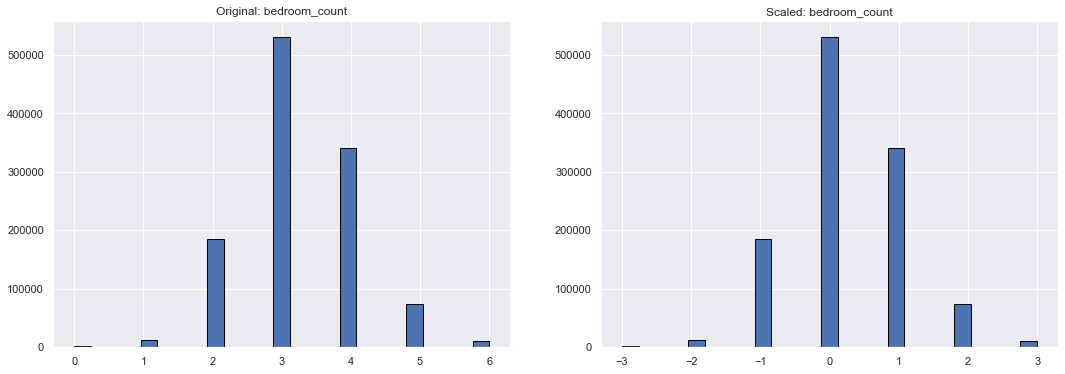

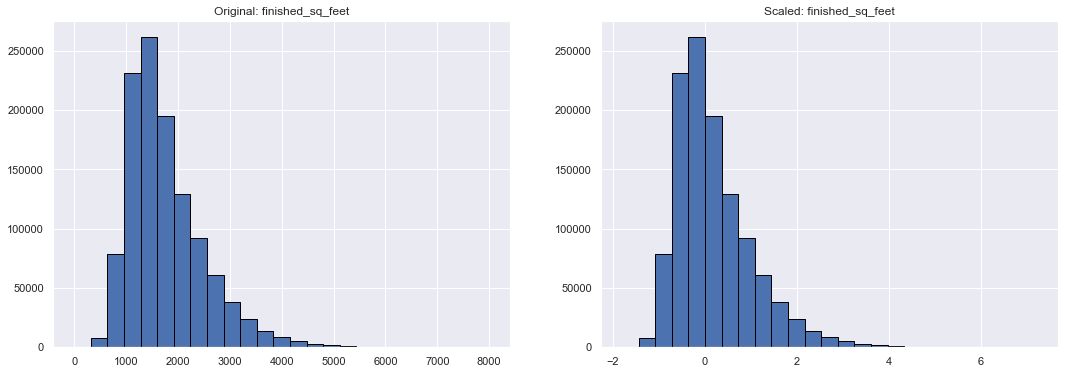

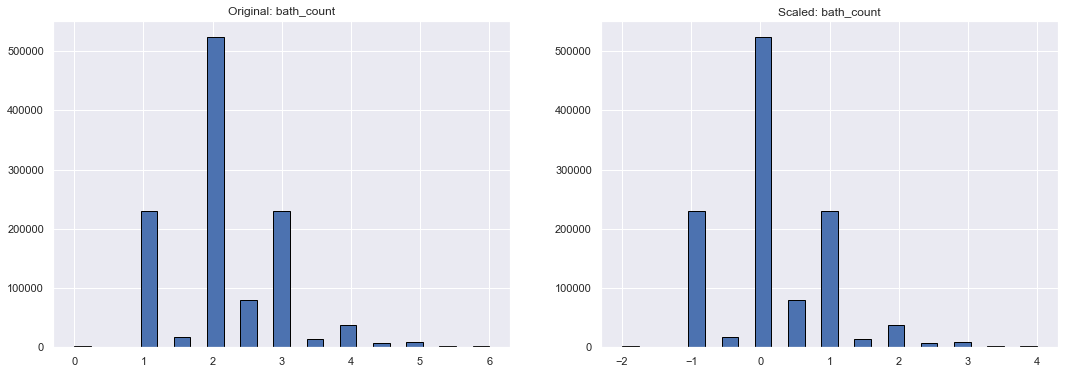

In [16]:
# Robust Scaler Plots

cols = ["bedroom_count", "finished_sq_feet", "bath_count"]

for col in cols:

    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(X_train[[col]])

    x_scaled = scaler.transform(X_train[[col]])

    plt.figure(figsize=(18, 6))
    plt.subplot(121)
    plt.hist(X_train[[col]], bins=25, ec='black')
    plt.title(f'Original: {col}')
    plt.subplot(122)
    plt.hist(x_scaled, bins=25, ec='black')
    plt.title(f'Scaled: {col}')

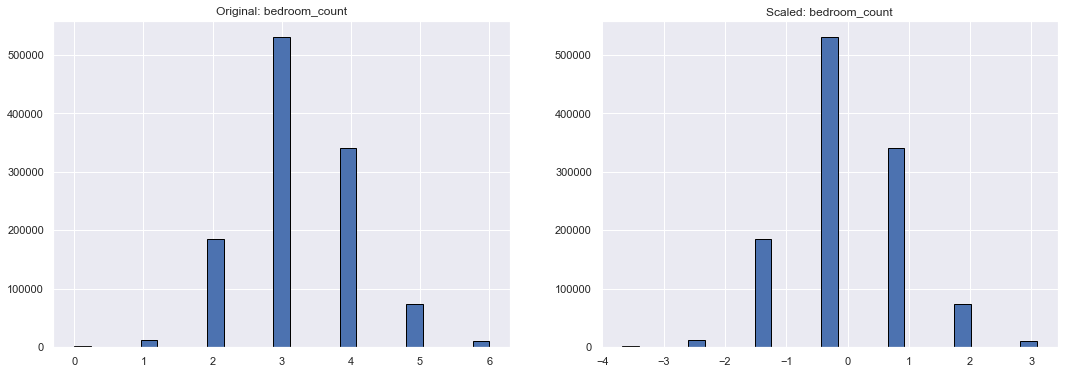

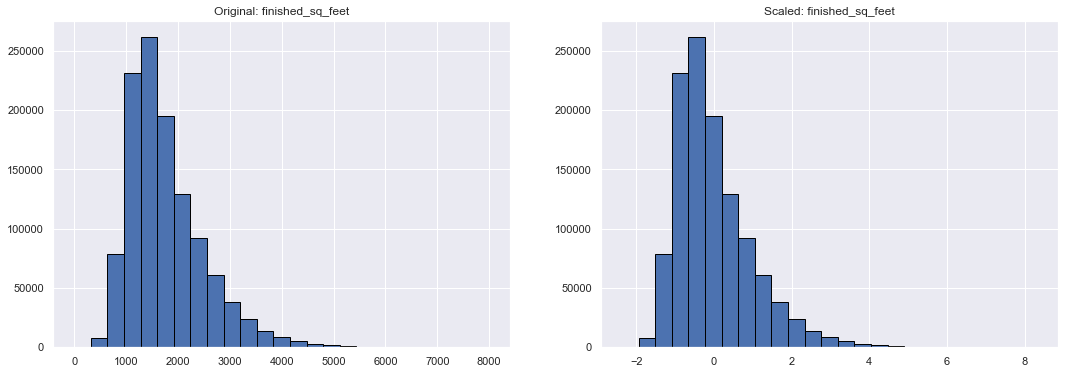

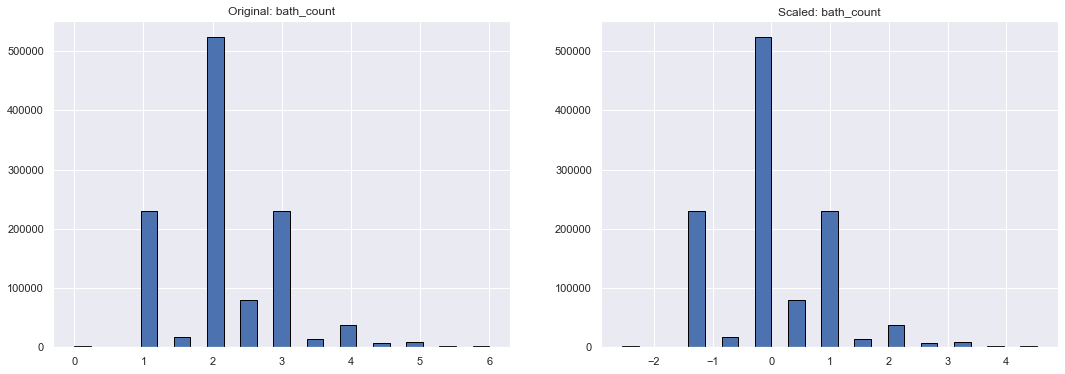

In [17]:
# Standard Scaler Plots

for col in cols:

    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(X_train[[col]])

    x_scaled = scaler.transform(X_train[[col]])

    plt.figure(figsize=(18, 6))
    plt.subplot(121)
    plt.hist(X_train[[col]], bins=25, ec='black')
    plt.title(f'Original: {col}')
    plt.subplot(122)
    plt.hist(x_scaled, bins=25, ec='black')
    plt.title(f'Scaled: {col}')

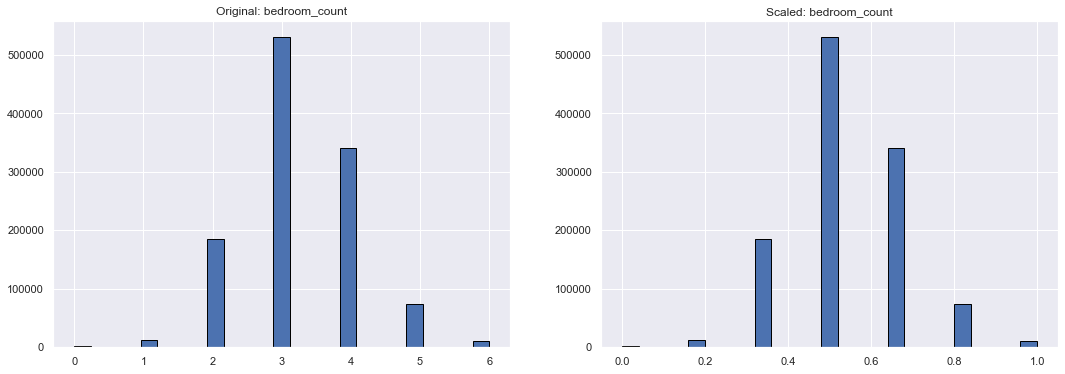

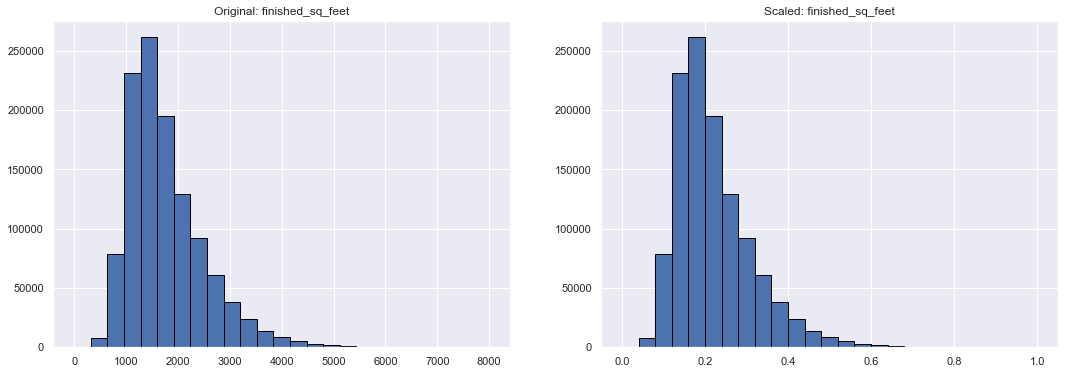

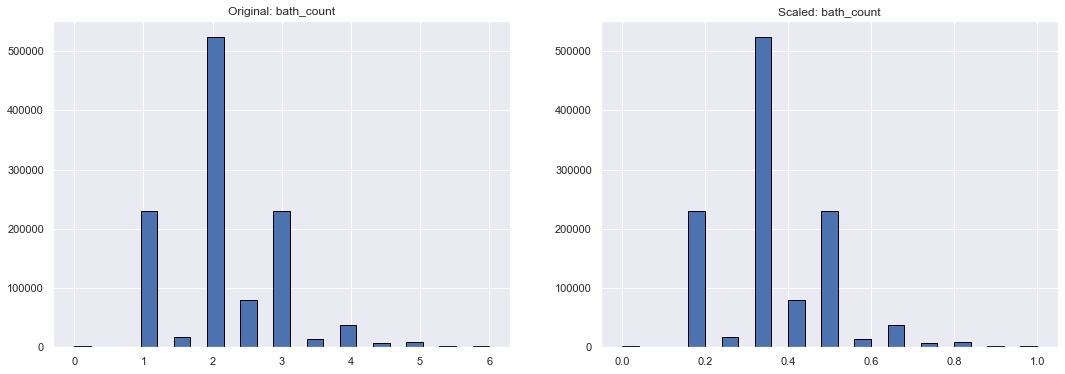

In [18]:
# MinMax Sccaler Plots

for col in cols:

    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(X_train[[col]])

    x_scaled = scaler.transform(X_train[[col]])

    plt.figure(figsize=(18, 6))
    plt.subplot(121)
    plt.hist(X_train[[col]], bins=25, ec='black')
    plt.title(f'Original: {col}')
    plt.subplot(122)
    plt.hist(x_scaled, bins=25, ec='black')
    plt.title(f'Scaled: {col}')

----
``2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?``

- (answer) Yes, sklearn's "scaler.inverse_tranformer()" returns the scaled values back to original values/observations. 

- However, the "object" type that is returned is after using the **.inverse_transform function is different than the original column/pd.Series input**.

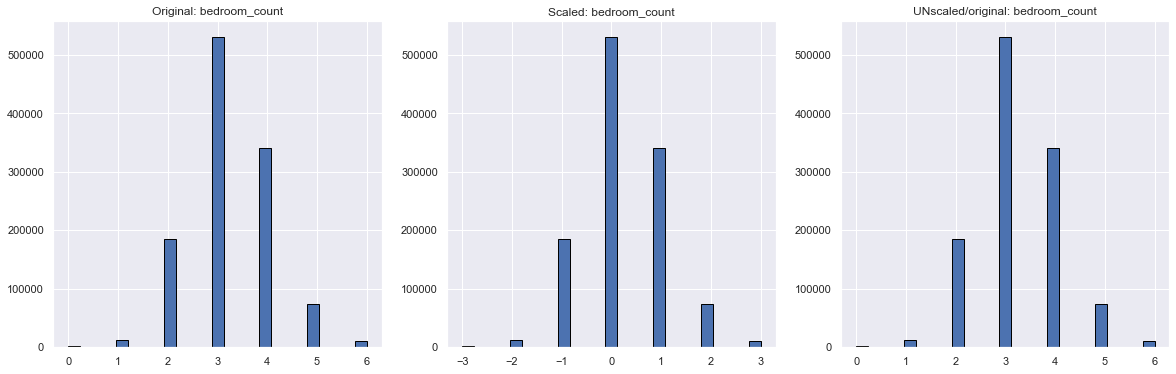

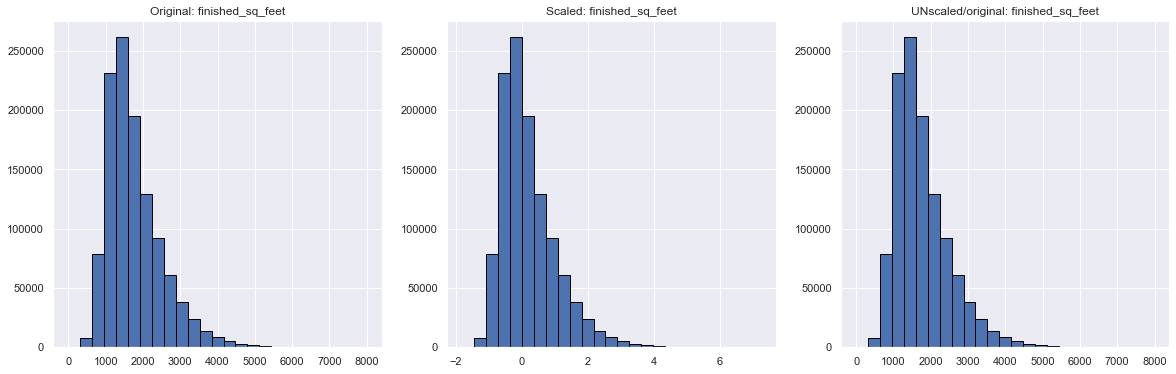

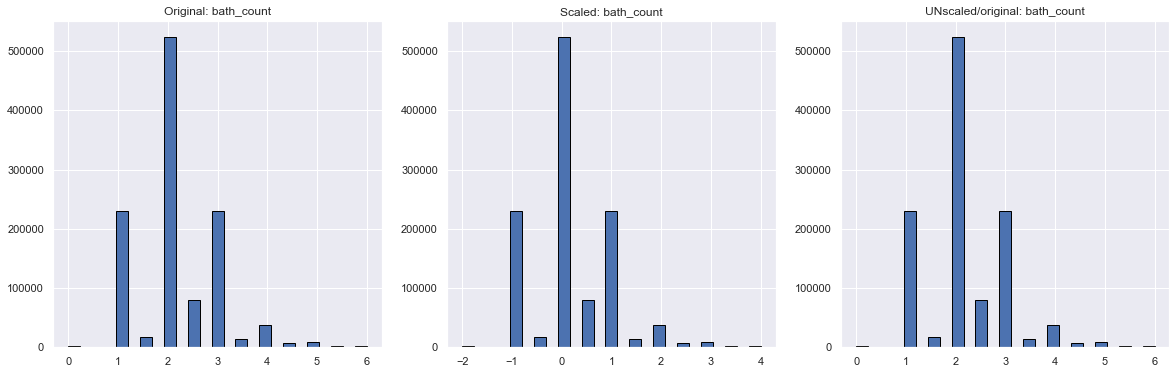

In [19]:
cols = ["bedroom_count", "finished_sq_feet", "bath_count"]

for col in cols:

    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(X_train[[col]])

    X_train_scaled = scaler.transform(X_train[[col]])
    X_train_unscaled = scaler.inverse_transform(X_train_scaled)

    plt.figure(figsize=(20, 6))

    # plotting original data/column values
    plt.subplot(131)
    plt.hist(X_train[[col]], bins=25, ec='black')
    plt.title(f'Original: {col}')
    
    # plotting scaled data
    plt.subplot(132)
    plt.hist(X_train_scaled, bins=25, ec='black')
    plt.title(f'Scaled: {col}')
    
    # plotting unscaled/original data again
    plt.subplot(133)
    plt.hist(X_train_unscaled, bins=25, ec='black')
    plt.title(f'UNscaled/original: {col}')

# note to self:
# suplot places multiple figures in the same window and takes in three (3) numbers: M, N, P 
# where M = the number of rows
# where N = the number of columns
# where P = plot placement (first, second, third, etc.)

----
``3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.``



In [20]:
# importing the needed sklearn function
from sklearn.preprocessing import QuantileTransformer

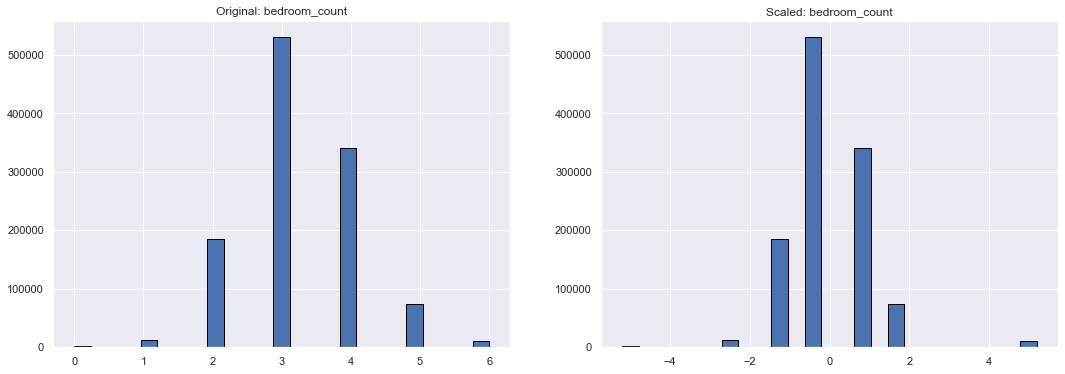

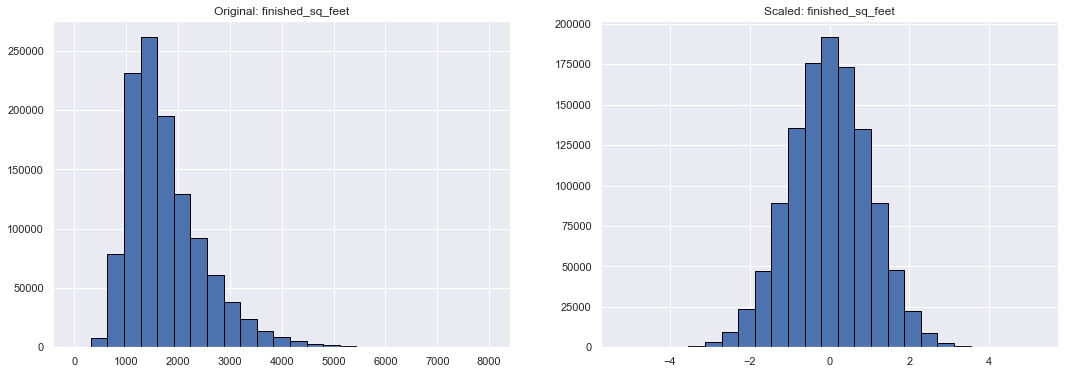

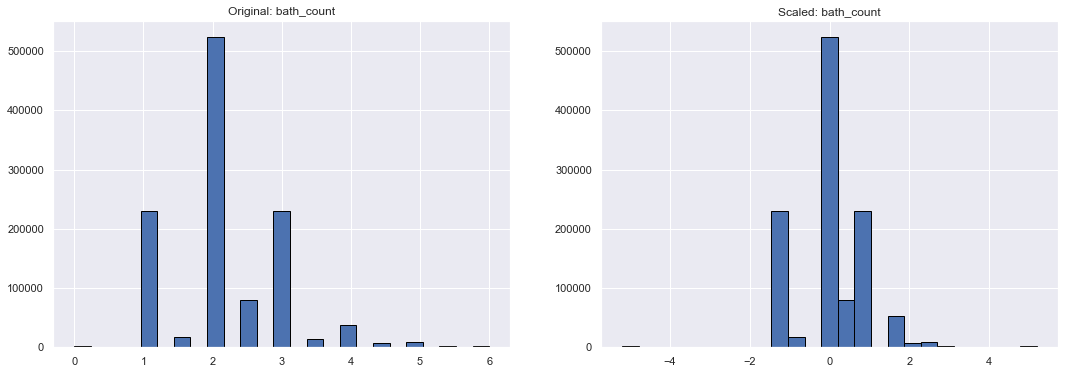

In [21]:
cols = ["bedroom_count", "finished_sq_feet", "bath_count"]

for col in cols:
    # passing the "normal" distribution parameter in Quantile Transformer function
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = "normal")

    # fitting the scaler to the column data/values
    scaler.fit(X_train[[col]])

    # transforming the data/values
    x_scaled = scaler.transform(X_train[[col]])

    # plotting original values
    plt.figure(figsize=(18, 6))
    plt.subplot(121)
    plt.hist(X_train[[col]], bins=25, ec='black')

    # plotting transformed Quantile values
    plt.title(f'Original: {col}')
    plt.subplot(122)
    plt.hist(x_scaled, bins=25, ec='black')
    plt.title(f'Scaled: {col}')

----
``4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?``

- Since the output_distribution argument in Quantile Transformer defaults to "uniform" we see a scaled uniform distribution across most* plotted columns/values.

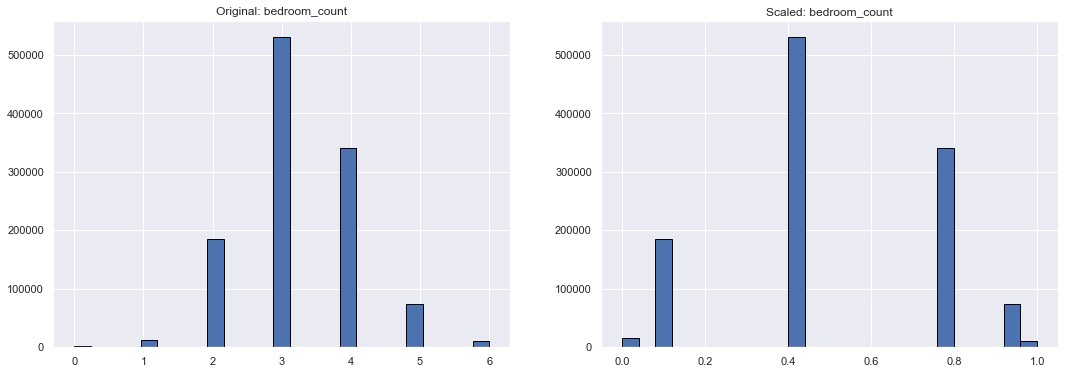

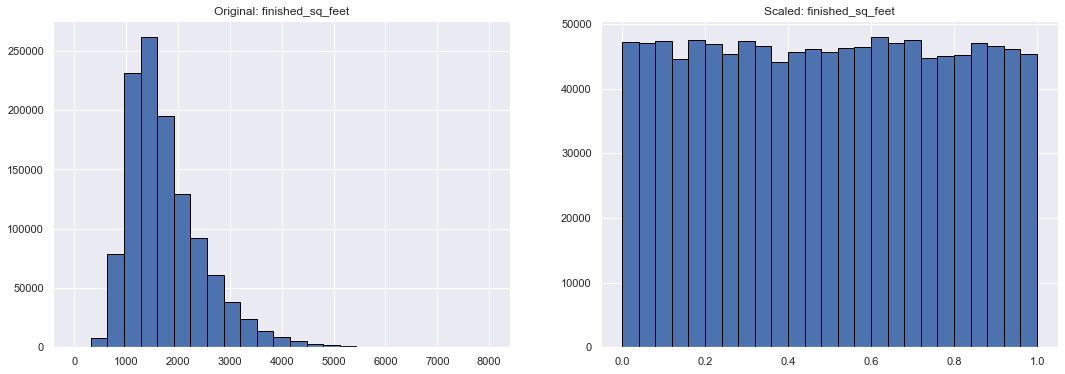

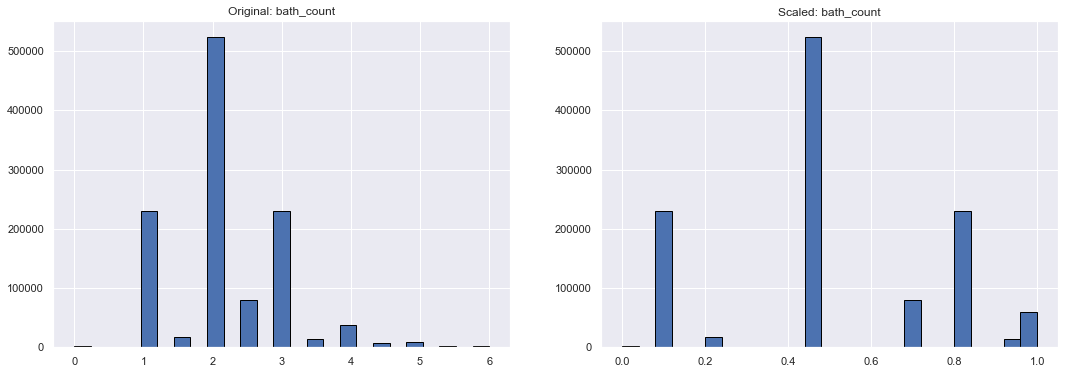

In [22]:
# omitting the output_distribution argument in "QuantileTransformer"



cols = ["bedroom_count", "finished_sq_feet", "bath_count"]

for col in cols:
    # passing the "normal" distribution parameter in Quantile Transformer function
    scaler = sklearn.preprocessing.QuantileTransformer()

    # fitting the scaler to the column data/values
    scaler.fit(X_train[[col]])

    # transforming the data/values
    x_scaled = scaler.transform(X_train[[col]])

    # plotting original values
    plt.figure(figsize=(18, 6))
    plt.subplot(121)
    plt.hist(X_train[[col]], bins=25, ec='black')

    # plotting transformed Quantile values
    plt.title(f'Original: {col}')
    plt.subplot(122)
    plt.hist(x_scaled, bins=25, ec='black')
    plt.title(f'Scaled: {col}')

----
``5. Based on the work you've done, choose a scaling method for your dataset.`` 

* Write a function within your wrangle.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. 

* **Be sure to only learn the parameters for scaling from your training data!**

In [25]:
# creating the scaling function for my zillow dataset
# columns to scale: bathrooms, bedrooms, finished_sq_feet, 


def scaled_data(train, validate, test):
    
    # cols i want to scale in the larger dataset/df
    scaled_columns = ["bedroom_count", "finished_sq_feet", "bath_count"]

    # creating a copy of the original zillow/dataframe
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    scaler = sklearn.preprocessing.RobustScaler()

    scaler.fit(train[scaled_columns])

    train_scaled[scaled_columns] = scaler.transform(train[scaled_columns])
    validate_scaled[scaled_columns] = scaler.transform(validate[scaled_columns])
    test_scaled[scaled_columns] = scaler.transform(test[scaled_columns])

    # returning the three (3) newly created dataframes
    return train_scaled, validate_scaled, test_scaled

----
### ``sklearn.preprocessing "QuantileTransformer" scale method``

Transform features using quantiles information.

* This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
    * It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
<br></br>
* The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. 
<br></br>
* The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. **Note that this transform is non-linear.** 
  * It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

In [24]:
train.corr().T

,bedroom_count,bath_count,finished_sq_feet,home_value,year_built,tax_amount,fips
bedroom_count,1.000000,0.625784,0.615780,0.268619,0.384081,0.270068,0.153665
bath_count,0.625784,1.000000,0.810455,0.482881,0.534218,0.484224,0.129416
finished_sq_feet,0.615780,0.810455,1.000000,0.558251,0.478634,0.554784,0.138975
home_value,0.268619,0.482881,0.558251,1.000000,0.283526,0.970671,0.096797
year_built,0.384081,0.534218,0.478634,0.283526,1.000000,0.291089,0.306805
tax_amount,0.270068,0.484224,0.554784,0.970671,0.291089,1.000000,0.042838
fips,0.153665,0.129416,0.138975,0.096797,0.306805,0.042838,1.000000
